# Exercício prático 

## Aula Síncrona 2 - Linguagem de Programação Aplicada
## 16/03/2024

---

## Parte 1 - Análise Exploratória dos Dados com Pandas

#### Importando bibliotecas

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Importando os dados


In [7]:
# read_csv
dados = pd.read_csv('wine_dataset.csv')

In [8]:
# visualizando os dados com head
print(dados.head())

   acidez_fixa  acidez_volatil  acido_citrico  acucar_residual  cloretos  \
0          7.6            1.58           0.00              2.1     137.0   
1          8.2            1.33           0.00              1.7      81.0   
2          8.1            1.33           0.00              1.8      82.0   
3          9.8            1.24           0.34              2.0      79.0   
4          8.0            1.18           0.21              1.9      83.0   

   dioxido_de_enxofre  densidade  sulfatos  perc_alcoolico tipo_vinho  
0                 5.0        9.0      3.50            0.40      tinto  
1                 3.0       12.0      3.53            0.49      tinto  
2                 3.0       12.0      3.54            0.48      tinto  
3                32.0      151.0      3.15            0.53      tinto  
4                14.0       41.0      3.34            0.47      tinto  


In [9]:
# quantidade de linhas e colunas com shape
quantidade_linhas, quantidade_colunas = dados.shape

print("Quantidade de linhas:", quantidade_linhas)
print("Quantidade de colunas:", quantidade_colunas)

Quantidade de linhas: 6138
Quantidade de colunas: 10


#### Análise Exploratória de Dados

In [10]:
# imprimir os tipos de cada coluna

print("Tipos de cada coluna:")
print(dados.dtypes)

Tipos de cada coluna:
acidez_fixa           float64
acidez_volatil        float64
acido_citrico         float64
acucar_residual       float64
cloretos              float64
dioxido_de_enxofre    float64
densidade             float64
sulfatos              float64
perc_alcoolico        float64
tipo_vinho             object
dtype: object


In [14]:
# resumo das variáveis, utilizando a função describe
resumo_variaveis_numericas = dados.describe()

print("Resumo estatístico das variáveis numéricas:")
print(resumo_variaveis_numericas)

Resumo estatístico das variáveis numéricas:
       acidez_fixa  acidez_volatil  acido_citrico  acucar_residual  \
count  6138.000000     6138.000000    6138.000000      6138.000000   
mean      7.214150        0.326779       0.324353         5.534718   
std       1.264585        0.148130       0.141189         4.740753   
min       3.800000        0.080000       0.000000         0.600000   
25%       6.400000        0.220000       0.250000         1.800000   
50%       7.000000        0.290000       0.310000         3.200000   
75%       7.700000        0.390000       0.400000         8.200000   
max      15.900000        1.580000       1.660000        31.600000   

          cloretos  dioxido_de_enxofre    densidade     sulfatos  \
count  6138.000000         6138.000000  6138.000000  6138.000000   
mean     48.814060           31.009123   117.680270     3.213641   
std      36.534073           17.658498    55.913171     0.158316   
min       0.020000            1.000000     6.000000  

In [33]:
# verificar valores faltantes com isna()

valores_faltantes = dados.isna()


tratado = valores_faltantes.any()


print("Valores faltantes no DataFrame:")
print(valores_faltantes)

print(tratado)
print(tratado.value_counts())


Valores faltantes no DataFrame:
      acidez_fixa  acidez_volatil  acido_citrico  acucar_residual  cloretos  \
0           False           False          False            False     False   
1           False           False          False            False     False   
2           False           False          False            False     False   
3           False           False          False            False     False   
4           False           False          False            False     False   
...           ...             ...            ...              ...       ...   
6133        False           False          False            False     False   
6134        False           False          False            False     False   
6135        False           False          False            False     False   
6136        False           False          False            False     False   
6137        False           False          False            False     False   

      dioxido_de_en

In [37]:
# verificar valores duplicados com duplicated()

valores_duplicados = dados.duplicated()

valores_duplicados_total = valores_duplicados.sum()

print("Valores duplicados no DataFrame:")
print(valores_duplicados)

print("Total:", valores_duplicados_total)

Valores duplicados no DataFrame:
0       False
1       False
2       False
3       False
4       False
        ...  
6133    False
6134    False
6135     True
6136    False
6137     True
Length: 6138, dtype: bool
Total: 1146


In [17]:
# calcular valores por categoria tipo_vinho  -value_counts()

valores_por_categoria = dados['tipo_vinho'].value_counts()

print("Valores por categoria na coluna 'tipo_vinho':")
print(valores_por_categoria)

Valores por categoria na coluna 'tipo_vinho':
tipo_vinho
branco    4740
tinto     1398
Name: count, dtype: int64


#### Visualização dos dados

Elaborar os gráficos e discutir os resultados



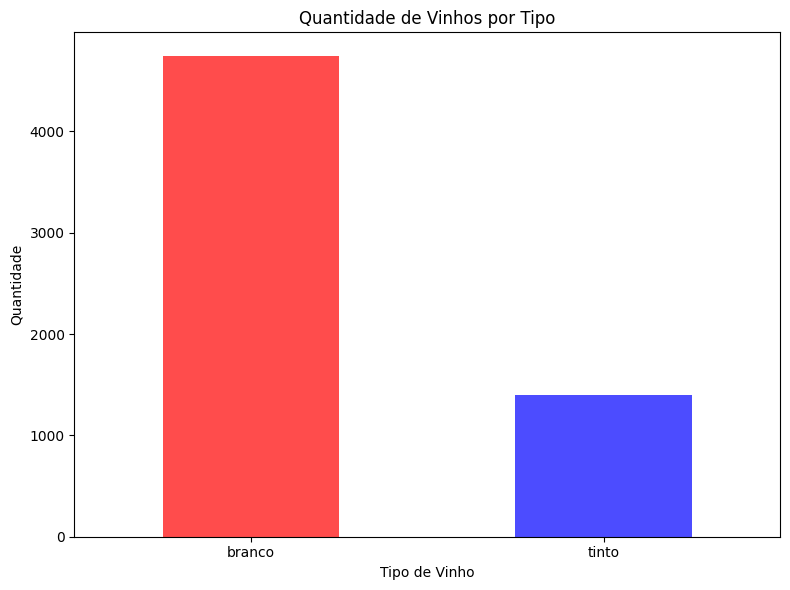

In [18]:
# gráfico da quantidade de vinhos por tipo (tinto ou branco)

valores_por_categoria = dados['tipo_vinho'].value_counts()

plt.figure(figsize=(8, 6))
valores_por_categoria.plot(kind='bar', color=['red', 'blue'], alpha=0.7)

plt.title('Quantidade de Vinhos por Tipo')
plt.xlabel('Tipo de Vinho')
plt.ylabel('Quantidade')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

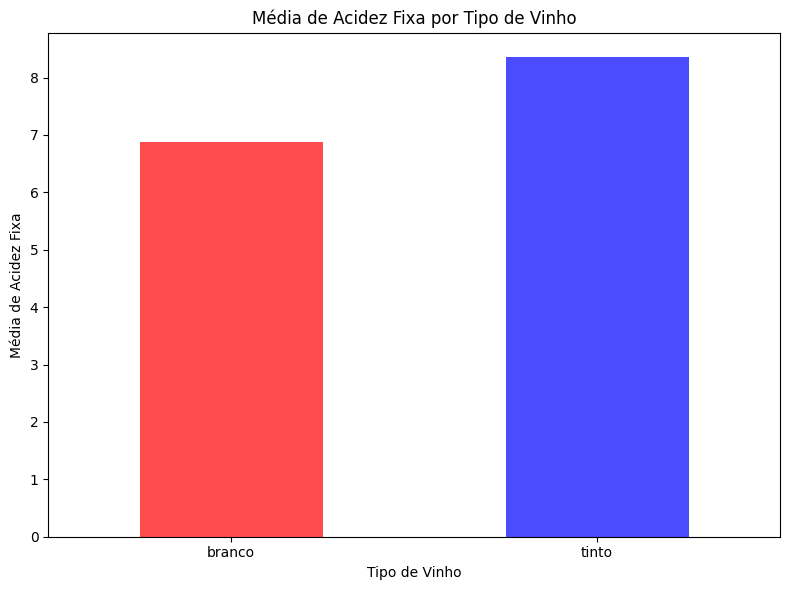

In [19]:
# gráfico da média de acidez fixa por tipo de vinho - criacao das variáveis com a média calculada

media_acidez_fixa_por_tipo = dados.groupby('tipo_vinho')['acidez_fixa'].mean()

plt.figure(figsize=(8, 6))
media_acidez_fixa_por_tipo.plot(kind='bar', color=['red', 'blue'], alpha=0.7)

plt.title('Média de Acidez Fixa por Tipo de Vinho')
plt.xlabel('Tipo de Vinho')
plt.ylabel('Média de Acidez Fixa')
plt.xticks(rotation=0)  # Rotacionar os rótulos do eixo x para melhor visualização

plt.tight_layout()
plt.show()

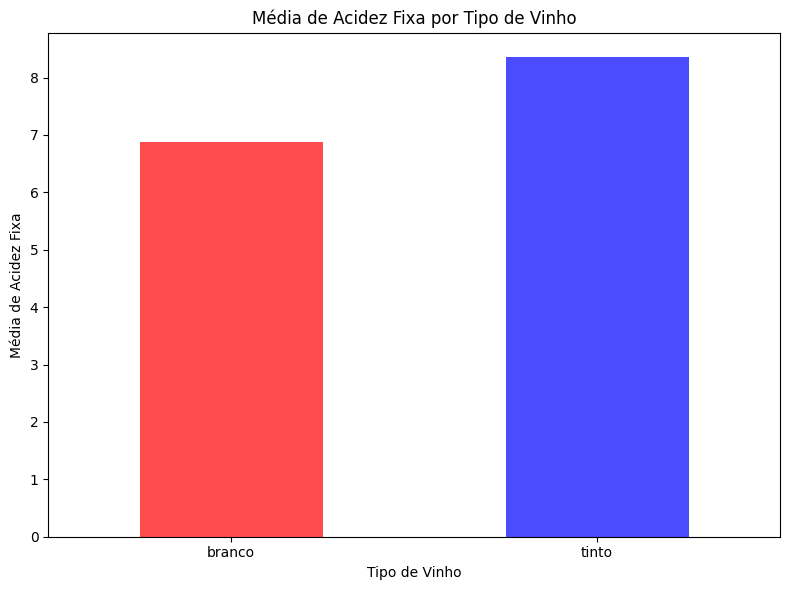

In [20]:
# gráfico da média de acidez fixa por tipo de vinho - criação do gráfico

media_acidez_fixa_por_tipo = dados.groupby('tipo_vinho')['acidez_fixa'].mean()

plt.figure(figsize=(8, 6))
media_acidez_fixa_por_tipo.plot(kind='bar', color=['red', 'blue'], alpha=0.7)

plt.title('Média de Acidez Fixa por Tipo de Vinho')
plt.xlabel('Tipo de Vinho')
plt.ylabel('Média de Acidez Fixa')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

---
## Parte 2 - Algoritmo ExtraTrees para prever o tipo do vinho

#### Importando bibliotecas

In [4]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

#### Preparação dos dados

In [38]:
# transformar coluna tipo_vinho em 0 e 1 (de categórica para numérica)
dados['tipo_vinho'] = LabelEncoder().fit_transform(dados['tipo_vinho']) 
dados.head()




NameError: name 'LabelEncoder' is not defined

In [ ]:
# separar as variáveis Y (Target - tipo do vinho) do restantE, que são as variáveis preditoras

#### Divisão em treino e teste

In [ ]:
# divisão dos dados em treino e teste: 30% pra treino e 70% para teste

#### Treinamento do modelo

In [ ]:
# modelo ExtraTreesClassifier
modelo = ExtraTreesClassifier()

In [ ]:
# ajuste do modelo


#### Cálculo da acurácia do modelo

In [ ]:
# cálculo da acurácia do modelo com o parametro score (para classificação)


In [ ]:
# imprimindo a acurácia do modelo - colocar as variáveis de teste entre parênteses
resultado = modelo.score()

#### Teste do modelo treinado

In [ ]:
# selecionando alguns valores para teste do modelo

In [ ]:
# testando o modelo com predict 

---
#### Fim do código
#### Obrigada!  
#### Profa. Luani R O Piva - https://www.linkedin.com/in/luanipiva/